# Лабораторная работа №2 Решение СЛАУ
Надо решить систему алгебраических линейных уравнений, заданную в виде:
$ A x = b, $ где:


$ a_{ii} = 1.0, \: \forall i \in 1,..n \qquad a_{ij} = \frac{1}{i + j}, \: i \neq j  \qquad b = \frac{1}{i}, \: \forall i \in 1,..n $

Также заранее оговорим, что под нормой вектора в этой работе будет подразумеваться евклидова норма.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# ---------- constants ----------
n = 10
steps = 30
epsilon = 0.0001
# -------------------------------

# ---------- helpful functions ----------
def print_matrix(name, A, n, m):
    print("\n", "Matrix", name, "(", n, "x", m, "):")
    
    for i in range(n):
        print("||", end = ' ')
        for j in range(m):
            if(is_zero(A[i][j]) >= 0):
                print(" ", end = '')
            print(format(is_zero(A[i][j]), '5.3f'), end = ' ')
        print("||")
    
    print("\n")
    
    return

def is_zero (num):
    if(np.abs(num) < epsilon):
        return 0.0
    else:
        return num

def vec_norm (v, n):
    res = 0.0
    for i in range(n):
        res = res + v[i] ** 2
    res = res ** (0.5)
    return res

def matrix_dot (A, x, n):
    res = np.zeros((n, 1))
    for i in range(n):
        for j in range(n):
            res[i] += A[i][j] * x[j]

    return res

def skalar_dot (a, b, n):
    res = 0.0
    for i in range(n):
        res += a[i] * b[i]

    return res
# ------------------------------------

Инициализируем наши матрицу и вектор:

In [2]:
# ---------- imput matrix initialization -----------
I = np.zeros((n, n))
for i in range(n):
   for j in range(n):
        if(i == j):
            I[i][j] = 1.0
        else:
            I[i][j] = 1.0 / (i + j + 2)
# --------------------------------------------------

# ---------- input vector initialization ----------
f = np.zeros((n, 1))
for i in range(n):
    f[i] = 1.0 / (i + 1)
# --------------------------------------------------

A = I
b = f

detA = np.linalg.det(A)

print_matrix("A", A, n, n)
print("detA = ", detA)
print_matrix("b", b, n, 1)
# ------------------------------------------


 Matrix A ( 10 x 10 ):
||  1.000  0.333  0.250  0.200  0.167  0.143  0.125  0.111  0.100  0.091 ||
||  0.333  1.000  0.200  0.167  0.143  0.125  0.111  0.100  0.091  0.083 ||
||  0.250  0.200  1.000  0.143  0.125  0.111  0.100  0.091  0.083  0.077 ||
||  0.200  0.167  0.143  1.000  0.111  0.100  0.091  0.083  0.077  0.071 ||
||  0.167  0.143  0.125  0.111  1.000  0.091  0.083  0.077  0.071  0.067 ||
||  0.143  0.125  0.111  0.100  0.091  1.000  0.077  0.071  0.067  0.062 ||
||  0.125  0.111  0.100  0.091  0.083  0.077  1.000  0.067  0.062  0.059 ||
||  0.111  0.100  0.091  0.083  0.077  0.071  0.067  1.000  0.059  0.056 ||
||  0.100  0.091  0.083  0.077  0.071  0.067  0.062  0.059  1.000  0.053 ||
||  0.091  0.083  0.077  0.071  0.067  0.062  0.059  0.056  0.053  1.000 ||


detA =  0.6358800605430553

 Matrix b ( 10 x 1 ):
||  1.000 ||
||  0.500 ||
||  0.333 ||
||  0.250 ||
||  0.200 ||
||  0.167 ||
||  0.143 ||
||  0.125 ||
||  0.111 ||
||  0.100 ||




Начнем с прямых методов: метода Гаусса с выбором главного элемента и LU-разложения.

Метод Гаусса:

In [3]:
x_inter = np.zeros(n)
matrix  = np.zeros((n, n + 1))

for i in range(n):
    for j in range(n):
        matrix[i][j] = A[i][j]
    matrix[i][n] = b[i]

for i in range(n):
        max_row = i + np.argmax(np.abs(matrix[i:, i]))
        matrix[[i, max_row]] = matrix[[max_row, i]]

        for j in range(i + 1, n):
            factor = matrix[j][i] / matrix[i][i]
            matrix[j] = matrix[j] - factor * matrix[i]

for i in range(n - 1, -1, -1):
    x_inter[i] = (matrix[i][-1] - np.dot(matrix[i][i + 1:n], x_inter[i + 1:n])) / matrix[i][i]

x_gauss = np.zeros((n, 1))

for i in range(n):
    x_gauss[i] = x_inter[i]

print_matrix("x_gauss", x_gauss, n, 1)
print("Gauss residual:", vec_norm(matrix_dot(A, x_gauss, n) - b, n) )


 Matrix x_gauss ( 10 x 1 ):
||  0.919 ||
||  0.176 ||
||  0.064 ||
||  0.027 ||
||  0.011 ||
||  0.004 ||
|| -0.001 ||
|| -0.003 ||
|| -0.005 ||
|| -0.006 ||


Gauss residual: [2.34694688e-16]


LU-разложение:

In [4]:
# ----------- funcs for LU-decomposition ----------
def LU_sum (L, U, i, j, max):
    res = 0.0
    for k in range(max):
        res = res + L[i][k] * U[k][j]
    return res

def L_sum (L, y, i, max):
    res = 0.0
    for p in range(max):
        res = res + L[i][p] * y[p]
    return res

def U_sum (U, x, n, i, min):
    res = 0.0
    for p in range(min, n):
        res = res + U[i][p] * x[p]
    return res
# --------------------------------------------------

L = np.eye(n)
U = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if(i <= j):
            U[i][j] = A[i][j] - LU_sum(L, U, i, j, i)
        if(i > j):
            L[i][j] = (A[i][j] - LU_sum(L, U, i, j, j)) / U[j][j]

print_matrix("L", L, n, n)
print_matrix("U", U, n, n)


# ---------- solving Ly = b ----------
y = np.zeros((n, 1))

for i in range(n):
    y[i] = b[i] - L_sum(L, y, i, i)
# ------------------------------------

# ---------- solving Ux = y ----------
x_lu = np.zeros((n, 1))

for i in range(n - 1, -1, -1):
    x_lu[i] = y[i] - U_sum(U, x_lu, n, i, i + 1)

for i in range(n):
    x_lu[i] /= U[i][i]
# ------------------------------------

print_matrix("x_lu", x_lu, n, 1)
print("LU residual:", vec_norm(matrix_dot(A, x_lu, n) - b, n) )


 Matrix L ( 10 x 10 ):
||  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000 ||
||  0.333  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000 ||
||  0.250  0.131  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000 ||
||  0.200  0.113  0.086  1.000  0.000  0.000  0.000  0.000  0.000  0.000 ||
||  0.167  0.098  0.078  0.066  1.000  0.000  0.000  0.000  0.000  0.000 ||
||  0.143  0.087  0.071  0.061  0.053  1.000  0.000  0.000  0.000  0.000 ||
||  0.125  0.078  0.065  0.056  0.050  0.045  1.000  0.000  0.000  0.000 ||
||  0.111  0.071  0.059  0.052  0.047  0.042  0.039  1.000  0.000  0.000 ||
||  0.100  0.065  0.055  0.049  0.044  0.040  0.037  0.034  1.000  0.000 ||
||  0.091  0.060  0.051  0.046  0.042  0.038  0.035  0.033  0.031  1.000 ||



 Matrix U ( 10 x 10 ):
||  1.000  0.333  0.250  0.200  0.167  0.143  0.125  0.111  0.100  0.091 ||
||  0.000  0.889  0.117  0.100  0.087  0.077  0.069  0.063  0.058  0.053 ||
||  0.000  0.000  0.922  0.080  0.072 

Перейдем к методам простой итерации. Их представляют методы Якоби и Зейделя.

Метод Якоби:

In [5]:
def Yak_sum (A, x, n, i):
    res = 0.0
    for j in range(n):
        if(j != i):
            res = res + A[i][j] * x[j]

    return res

cnt_yak = 0
resid_yak  = np.zeros(steps)
x_prev_yak = np.ones ((n, 1))
x_next_yak = np.zeros((n, 1))

while (cnt_yak < steps):
    for i in range(n):
        x_next_yak[i] = (b[i] - Yak_sum(A, x_prev_yak, n, i)) / A[i][i]

    x_prev_yak = x_next_yak
    resid_yak[cnt_yak] = vec_norm(matrix_dot(A, x_next_yak, n) - b, n)
    cnt_yak += 1

print_matrix("x_yak", x_next_yak, n, 1)
print("Yakobi residual:", vec_norm(matrix_dot(A, x_next_yak, n) - b, n) )


 Matrix x_yak ( 10 x 1 ):
||  0.919 ||
||  0.176 ||
||  0.064 ||
||  0.027 ||
||  0.011 ||
||  0.004 ||
|| -0.001 ||
|| -0.003 ||
|| -0.005 ||
|| -0.006 ||


Yakobi residual: [2.2887834e-16]


Метод Зейделя:

In [6]:
def Zeid_sum_prev (A, x, n, i):
    res = 0.0
    for j in range(i + 1, n):
        res = res + A[i][j] * x[j]

    return res

def Zeid_sum_next (A, x, i):
    res = 0.0
    for j in range(i):
        res = res + A[i][j] * x[j]

    return res


cnt_zeid = 0
resid_zeid = np.zeros(steps)
x_prev_zeid = np.ones ((n, 1))
x_next_zeid = np.zeros((n, 1))

while (cnt_zeid < steps):
    for i in range(n):
        x_next_zeid[i] = (b[i] - Zeid_sum_next(A, x_next_zeid, i) - Zeid_sum_prev(A, x_prev_zeid, n, i)) / A[i][i]

    x_prev_zeid = x_next_zeid
    resid_zeid[cnt_zeid] = vec_norm(matrix_dot(A, x_next_zeid, n) - b, n)
    cnt_zeid += 1

print_matrix("x_zeid", x_next_zeid, n, 1)
print("Zeidel residual:", vec_norm(matrix_dot(A, x_next_zeid, n) - b, n) )


 Matrix x_zeid ( 10 x 1 ):
||  0.919 ||
||  0.176 ||
||  0.064 ||
||  0.027 ||
||  0.011 ||
||  0.004 ||
|| -0.001 ||
|| -0.003 ||
|| -0.005 ||
|| -0.006 ||


Zeidel residual: [9.61481343e-17]


Ранее МПИ были без параметра. Теперь рассмотрим однопараметрический метод - метод верхней релаксации:

In [7]:
def Relax_sum_prev (A, x, n, i):
    res = 0.0
    for j in range(i + 1, n):
        res = res + A[i][j] * x[j]

    return res

def Relax_sum_next (A, x, i):
    res = 0.0
    for j in range(i):
        res = res + A[i][j] * x[j]

    return res

omega = 0.9
cnt_relax = 0
resid_relax = np.zeros(steps)
x_prev_relax = np.ones ((n, 1))
x_next_relax = np.zeros((n, 1))

while (cnt_relax < steps):
    for i in range(n):
        x_next_relax[i] = (1 - omega) * x_prev_relax[i] + omega * (b[i] - Relax_sum_next(A, x_next_relax, i) - Relax_sum_prev(A, x_prev_relax, n, i)) / A[i][i]

    x_prev_relax = x_next_relax
    resid_relax[cnt_relax] = vec_norm(matrix_dot(A, x_next_relax, n) - b, n)
    cnt_relax += 1

print_matrix("x_relax", x_next_relax, n, 1)
print("Relax residual:", vec_norm(matrix_dot(A, x_next_relax, n) - b, n) )


 Matrix x_relax ( 10 x 1 ):
||  0.919 ||
||  0.176 ||
||  0.064 ||
||  0.027 ||
||  0.011 ||
||  0.004 ||
|| -0.001 ||
|| -0.003 ||
|| -0.005 ||
|| -0.006 ||


Relax residual: [9.61481343e-17]


Перейдем к вариационным итерационным методам, основанным на поиске экстремума энергетического функционала. Первый из них - метод градиентного спуска - представлен ниже:

In [8]:
cnt_down = 0
resid_down = np.zeros(steps)
tau = 0.0

r_down = np.zeros((n, 1))

x_prev_down = np.ones((n, 1))
x_next_down = np.zeros((n, 1))


while (cnt_down < steps):
    r_down = b - matrix_dot(A, x_prev_down, n)

    tau = skalar_dot( r_down, r_down, n) / (skalar_dot(matrix_dot(A, r_down, n), r_down, n))

    x_next_down = x_prev_down + tau * r_down

    resid_down[cnt_down] = vec_norm(matrix_dot(A, x_next_down, n) - b, n)
    cnt_down += 1

    x_prev_down = x_next_down

print_matrix("x_down", x_next_down, n, 1)
print("Grad down residual:", vec_norm(matrix_dot(A, x_next_down, n) - b, n) )


 Matrix x_down ( 10 x 1 ):
||  0.919 ||
||  0.176 ||
||  0.064 ||
||  0.027 ||
||  0.011 ||
||  0.004 ||
|| -0.001 ||
|| -0.003 ||
|| -0.005 ||
|| -0.006 ||


Grad down residual: [2.72976995e-11]


Далее метод сопряженных градиентов:

In [9]:
cnt_grad = 0
resid_grad = np.zeros(steps)
alpha    = 0.0

r_prev_grad = np.zeros((n, 1))
r_next_grad = np.zeros((n, 1))

x_prev_grad = np.ones((n, 1))
x_next_grad = np.zeros((n, 1))

z_prev_grad = np.zeros((n, 1))
z_next_grad = np.zeros((n, 1))

r_prev_grad = b - matrix_dot(A, x_prev_grad, n)
z_prev_grad = r_prev_grad

while (cnt_grad < steps):
    alpha = skalar_dot(r_prev_grad, r_prev_grad, n) / (skalar_dot(matrix_dot(A, z_prev_grad, n), z_prev_grad, n))

    x_next_grad = x_prev_grad + alpha * z_prev_grad

    r_next_grad = r_prev_grad - alpha * matrix_dot(A, z_prev_grad, n)

    z_next_grad = r_next_grad + (skalar_dot(r_next_grad, r_next_grad, n) / skalar_dot(r_prev_grad, r_prev_grad, n)) * z_prev_grad 

    resid_grad[cnt_grad] = vec_norm(matrix_dot(A, x_next_grad, n) - b, n)
    cnt_grad += 1

    r_prev_grad = r_next_grad
    x_prev_grad = x_next_grad
    z_prev_grad = z_next_grad

print_matrix("x_grad", x_next_grad, n, 1)
print("Grad residual:", vec_norm(matrix_dot(A, x_next_grad, n) - b, n) )


 Matrix x_grad ( 10 x 1 ):
||  0.919 ||
||  0.176 ||
||  0.064 ||
||  0.027 ||
||  0.011 ||
||  0.004 ||
|| -0.001 ||
|| -0.003 ||
|| -0.005 ||
|| -0.006 ||


Grad residual: [1.11886302e-15]


Наконец, метод минимальных невязок:

In [10]:
cnt_min_res = 0
resid_min_res = np.zeros(steps)
tau = 0.0

r_min_res = np.zeros((n, 1))

x_prev_min_res = np.ones((n, 1))
x_next_min_res = np.zeros((n, 1))


while (cnt_min_res < steps):
    r_min_res = b - matrix_dot(A, x_prev_min_res, n)

    tau = skalar_dot(matrix_dot(A, r_min_res, n), r_min_res, n) / (skalar_dot(matrix_dot(A, r_min_res, n), matrix_dot(A, r_min_res, n), n))

    x_next_min_res = x_prev_min_res + tau * r_min_res

    resid_min_res[cnt_min_res] = vec_norm(matrix_dot(A, x_next_min_res, n) - b, n)
    cnt_min_res += 1

    x_prev_min_res = x_next_min_res

print_matrix("x_min_res", x_next_min_res, n, 1)
print("MINRES residual:", vec_norm(matrix_dot(A, x_next_min_res, n) - b, n) )


 Matrix x_min_res ( 10 x 1 ):
||  0.919 ||
||  0.176 ||
||  0.064 ||
||  0.027 ||
||  0.011 ||
||  0.004 ||
|| -0.001 ||
|| -0.003 ||
|| -0.005 ||
|| -0.006 ||


MINRES residual: [1.08237063e-10]


В конце построим графики логарифма нормы невязки от числа итераций для сравнения скоростей сходимости примененных методов.

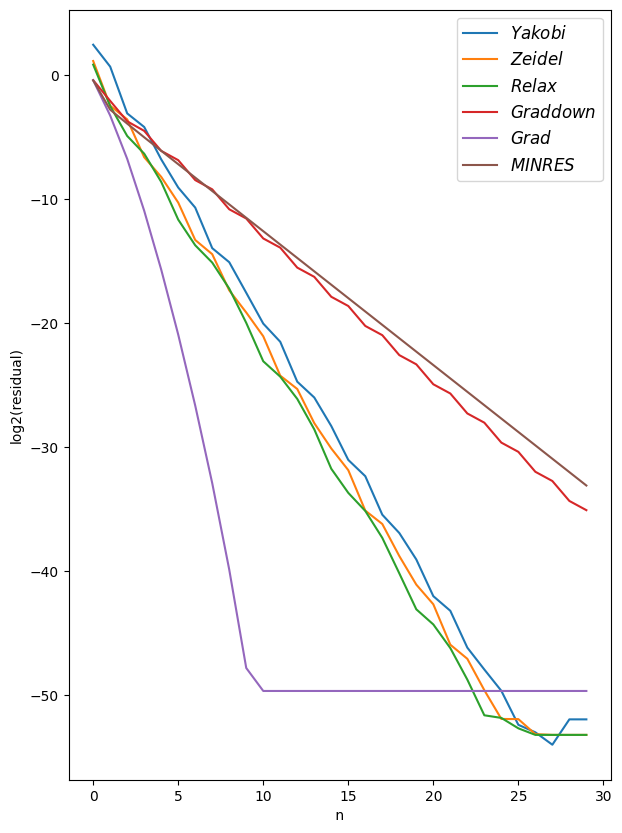

In [11]:
x_axis = np.zeros(steps)
for i in range(steps):
    x_axis[i] = i

fig = plt.figure(figsize=(7, 10))
plot = fig.add_subplot()

plot.plot(x_axis, np.log2(resid_yak    ),label = r'$Yakobi   $')
plot.plot(x_axis, np.log2(resid_zeid   ),label = r'$Zeidel   $')
plot.plot(x_axis, np.log2(resid_relax  ),label = r'$Relax    $')
plot.plot(x_axis, np.log2(resid_down   ),label = r'$Grad_down$')
plot.plot(x_axis, np.log2(resid_grad   ),label = r'$Grad     $')
plot.plot(x_axis, np.log2(resid_min_res),label = r'$MINRES   $')

#plot.set(xlim=(-1, 5), ylim=(-0.5, 3))
plot.set_xlabel(' n ')
plot.set_ylabel('log2(residual)')
plot.legend(loc='best', fontsize=12)
plt.show()

# Выводы
В данной лабораторной работе мы ознакомились на практике с численными методами решения СЛАУ: как прямыми, так и итерационными. Были рассмотрены методы Гаусса с выбором главного элемента, LU-разложение, Якоби, Зейделя, верхней релаксации, градиентного спуска, сопряженных градиентов и минимальных невязок. Построение графиков подтвердило ожидания по скорости для методов Якоби, Зейделя, верхней релаксации и сопряженных градиентов. Методы же градиентоного спуска и минимальных невязок оказались неэффективными для данной системы (их спад самый медленный).